In [1]:
import cv2
import tifffile as tiff
import exifread 
import matplotlib.pyplot as pl
import numpy as np
import os

In [34]:
# ejemplo para obtener homografía

img_dir = '/home/ivan/Documents/Adentu/DATA/Paneles/Vuelos/Vuelo_01_38m-5ms-SF80-SL80-GSD5/Imagenes/'
IRGB = cv2.cvtColor(cv2.imread(os.path.join(img_dir,'07-41-12-871_digital.jpg')), cv2.COLOR_BGR2RGB)
ITERM = tiff.imread(os.path.join(img_dir, '07-41-12-873_radiometric.tiff')).astype(float)

exif = exifread.process_file(open(os.path.join(img_dir,'07-41-12-871_digital.jpg'),'rb'))
print exif
ITERM = ((ITERM - ITERM.min())/(ITERM.max()-ITERM.min())*255).astype(np.uint8)

pts_origin = [  [279,30],
                [409,33],
                [130,750],
                [246,796],
                [649,110],
                [798,117],
                [498,832],
                [632,873],
                [1015,193],
                [1182,202],
                [860,913],
                [1013,959]]

pts_origin = [   [65,45],
                 [180,48],
                 [20,290],
                 [131,307],
                 [438,124],
                 [571,134],
                 [293,850],
                 [415,896],
                 [1177,273],
                 [1349,289],
                 [1017,994],
                 [1177,1050]]
                

pts_target = [  [175,66],
                [216,67],
                [125,298],
                [161,311],
                [292,92],
                [339,94],
                [241,324],
                [284,338],
                [408,118],
                [461,123],
                [358,351],
                [405,365]]

pts_target = [[103,90],
             [139,92],
             [88,167],
             [123,174],
             [220,115],
             [262,119],
             [173,347],
             [211,363],
             [455,163],
             [508,170],
             [404,394],
             [453,413]]
                
pts_origin = np.array(pts_origin).astype(float)
pts_target = np.array(pts_target).astype(float)

H = cv2.findHomography(pts_origin, pts_target)

I2 = cv2.warpPerspective(IRGB, H[0], ITERM.shape[::-1])

{'GPS GPSLatitude': (0x0002) Ratio=[26, 22, 31651/1000] @ 330, 'GPS GPSLongitude': (0x0004) Ratio=[70, 4, 4861/100] @ 354, 'GPS GPSMeasureMode': (0x000A) ASCII=3 @ 322, 'Image GPSInfo': (0x8825) Long=228 @ 102, 'Image ExifOffset': (0x8769) Long=142 @ 90, 'Image Model': (0x0110) ASCII=WIRIS @ 120, 'EXIF ComponentsConfiguration': (0x9101) Undefined=YCbCr @ 176, 'EXIF DateTimeOriginal': (0x9003) ASCII=2018:06:05 07:41:13 @ 208, 'Image YCbCrPositioning': (0x0213) Short=Centered @ 78, 'Image XResolution': (0x011A) Ratio=1 @ 126, 'Image Make': (0x010F) ASCII=Workswell @ 110, 'GPS GPSLatitudeRef': (0x0001) ASCII=S @ 250, 'GPS GPSTimeStamp': (0x0007) Ratio=[4294967285, 4294967285, 4294967285] @ 386, 'Image YResolution': (0x011B) Ratio=1 @ 134, 'EXIF FlashPixVersion': (0xA000) Undefined=0100 @ 188, 'GPS GPSLongitudeRef': (0x0003) ASCII=W @ 274, 'EXIF ColorSpace': (0xA001) Short=Uncalibrated @ 200, 'EXIF ExifVersion': (0x9000) Undefined=0230 @ 152, 'Image ResolutionUnit': (0x0128) Short=Not Abso

0
255


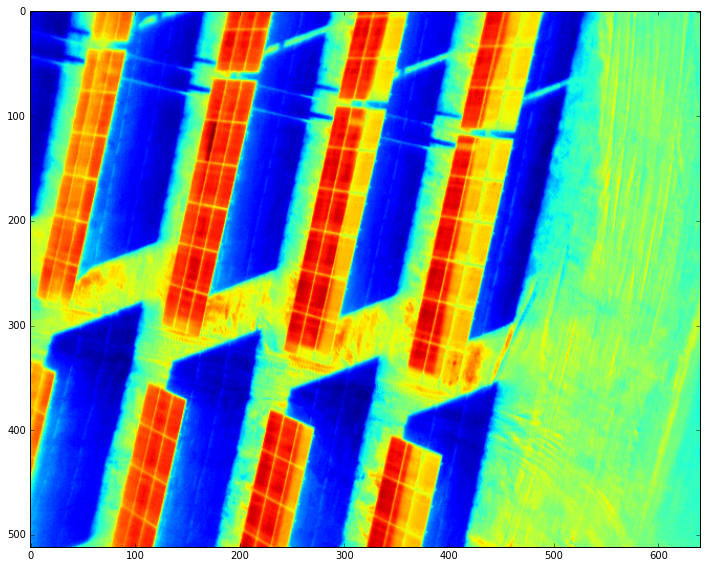

In [35]:
print ITERM.min()
print ITERM.max()

pl.figure(figsize=(12,12))
pl.imshow(ITERM)
pl.show()

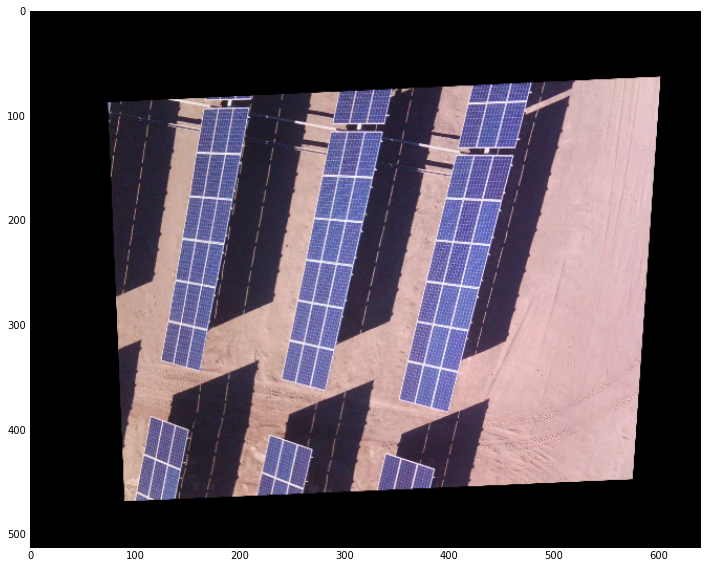

In [36]:
pl.figure(figsize=(12,12))
pl.imshow(I2)
pl.show()

In [37]:
IMASK = np.where(I2[:,:,0] == 0)

In [38]:
ITERM[IMASK] = 0

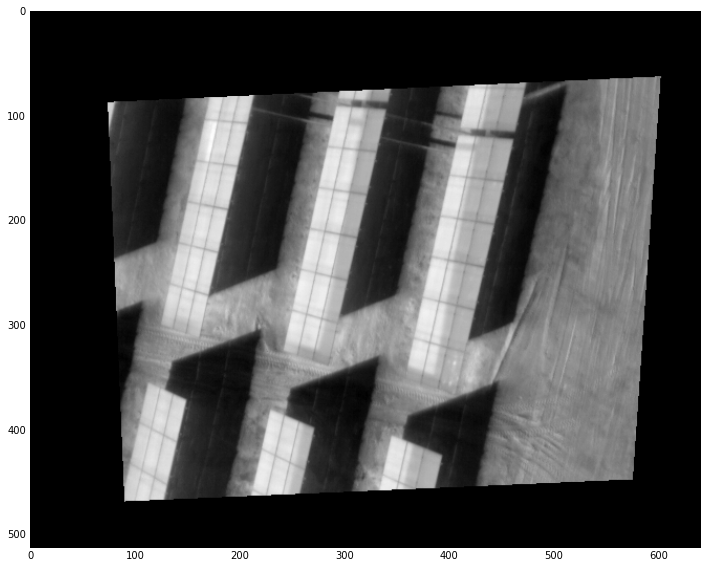

In [39]:
pl.figure(figsize=(12,12))
pl.imshow(ITERM, cmap='gray')
pl.show()

In [40]:
I2LAB = cv2.cvtColor(I2, cv2.COLOR_RGB2LAB)

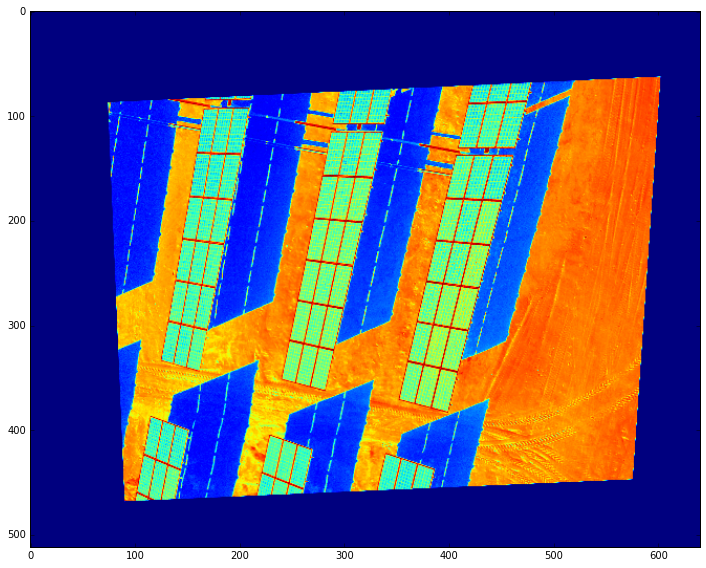

In [41]:
pl.figure(figsize=(12,12))
pl.imshow(I2LAB[:,:,0])
pl.show()

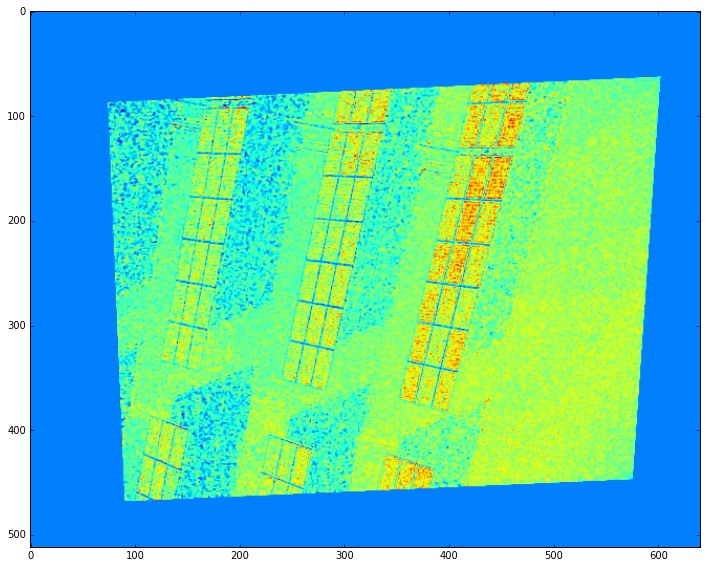

In [42]:
pl.figure(figsize=(12,12))
pl.imshow(I2LAB[:,:,1])
pl.show()

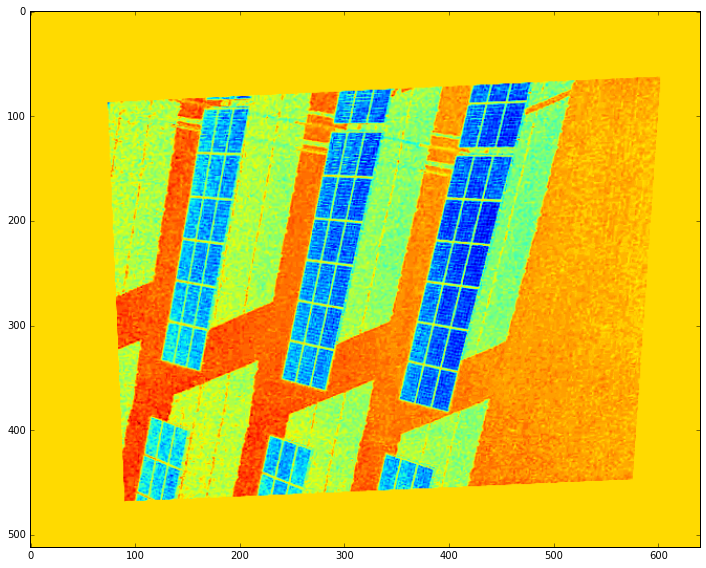

In [43]:
pl.figure(figsize=(12,12))
pl.imshow(I2LAB[:,:,2])
pl.show()

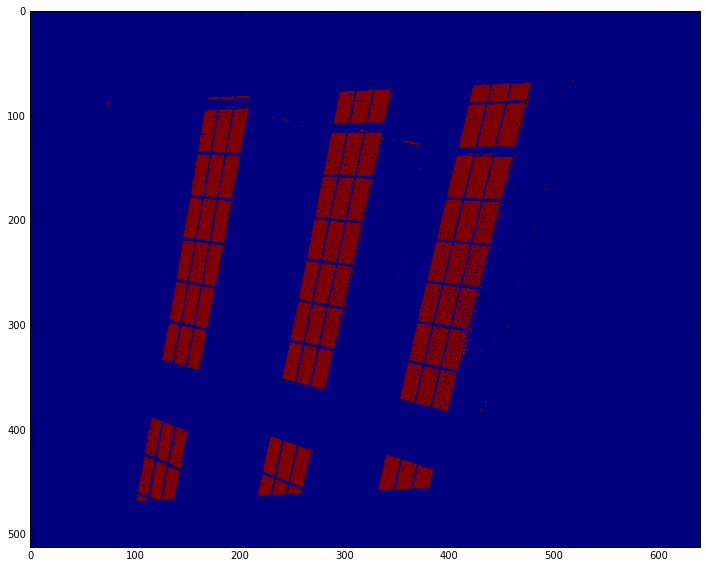

In [44]:
pl.figure(figsize=(12,12))
IMASK = (I2LAB[:,:,2]<110) * (I2LAB[:,:,0]>60) * (I2LAB[:,:,0]<160)
pl.imshow(IMASK)
pl.show()

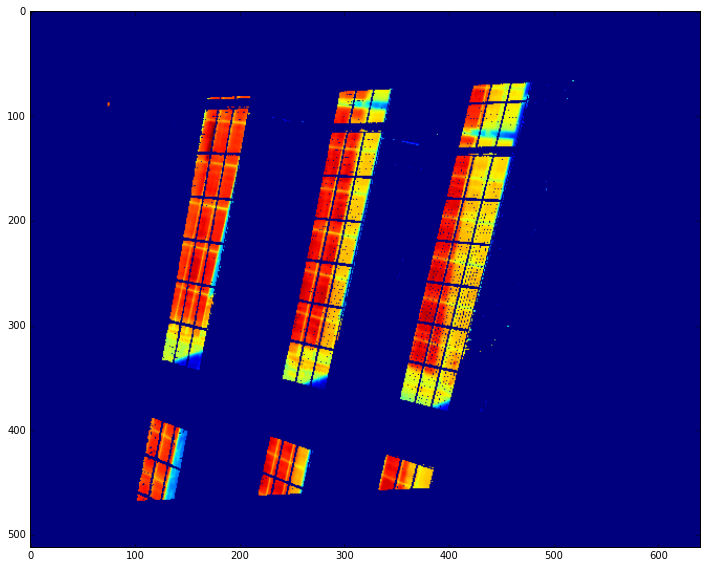

In [45]:
pl.figure(figsize=(12,12))
pl.imshow(IMASK*ITERM)
pl.show()

{'GPS GPSLatitude': (0x0002) Ratio=[26, 22, 29547/1000] @ 330, 'GPS GPSLongitude': (0x0004) Ratio=[70, 4, 24361/500] @ 354, 'GPS GPSMeasureMode': (0x000A) ASCII=3 @ 322, 'Image GPSInfo': (0x8825) Long=228 @ 102, 'Image ExifOffset': (0x8769) Long=142 @ 90, 'Image Model': (0x0110) ASCII=WIRIS @ 120, 'EXIF ComponentsConfiguration': (0x9101) Undefined=YCbCr @ 176, 'EXIF DateTimeOriginal': (0x9003) ASCII=2018:06:05 07:41:33 @ 208, 'Image YCbCrPositioning': (0x0213) Short=Centered @ 78, 'Image XResolution': (0x011A) Ratio=1 @ 126, 'Image Make': (0x010F) ASCII=Workswell @ 110, 'GPS GPSLatitudeRef': (0x0001) ASCII=S @ 250, 'GPS GPSTimeStamp': (0x0007) Ratio=[4294967285, 4294967285, 4294967285] @ 386, 'Image YResolution': (0x011B) Ratio=1 @ 134, 'EXIF FlashPixVersion': (0xA000) Undefined=0100 @ 188, 'GPS GPSLongitudeRef': (0x0003) ASCII=W @ 274, 'EXIF ColorSpace': (0xA001) Short=Uncalibrated @ 200, 'EXIF ExifVersion': (0x9000) Undefined=0230 @ 152, 'Image ResolutionUnit': (0x0128) Short=Not Abs

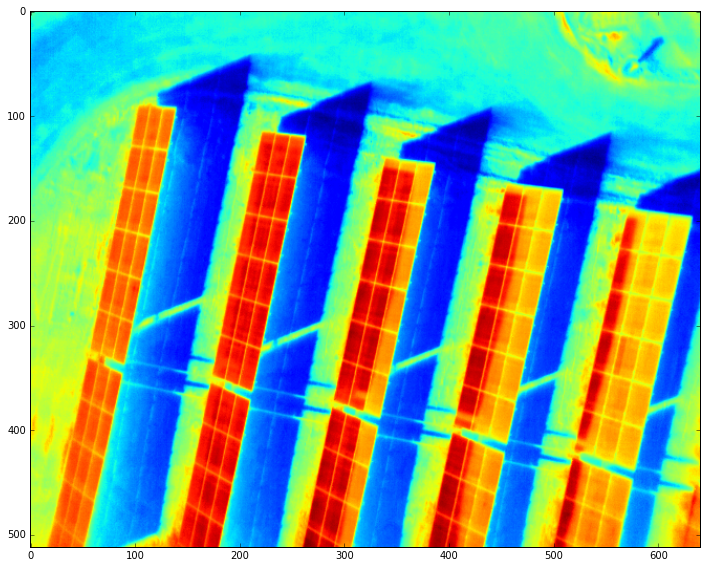

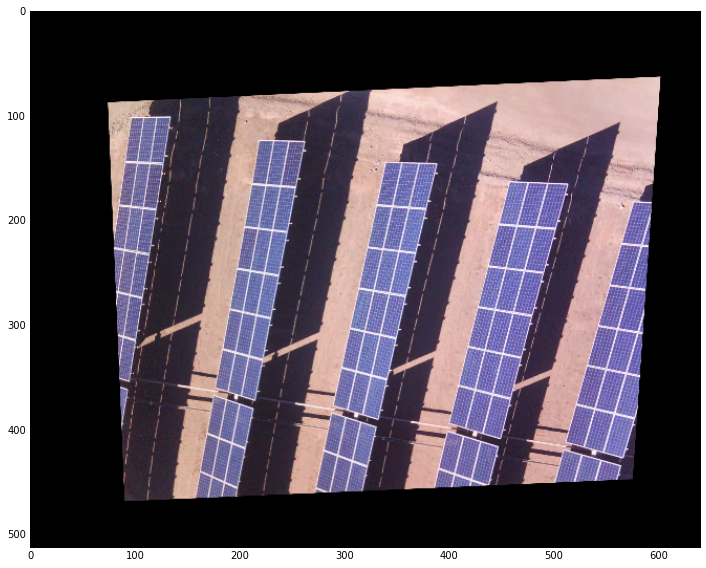

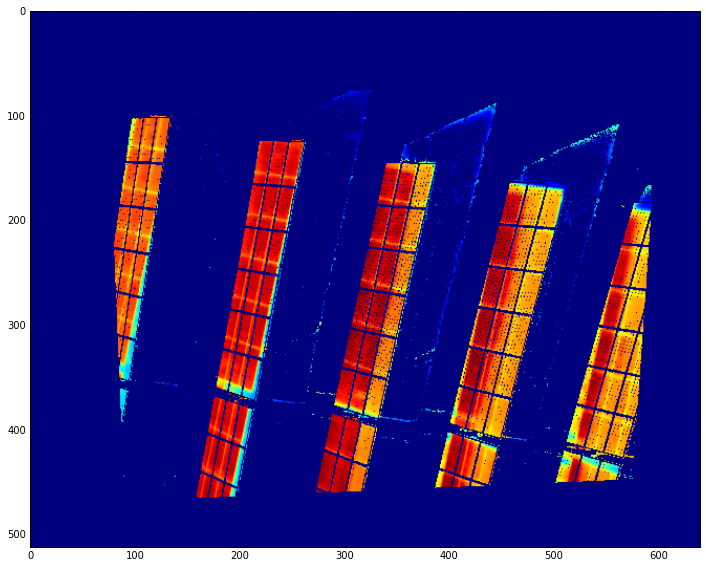

True

In [46]:
IRGB = cv2.cvtColor(cv2.imread(os.path.join(img_dir,'07-42-24-928_digital.jpg')), cv2.COLOR_BGR2RGB)
ITERM = tiff.imread(os.path.join(img_dir, '07-42-24-932_radiometric.tiff')).astype(float)
ITERM = ((ITERM - ITERM.min())/(ITERM.max()-ITERM.min())*255).astype(np.uint8)

exif = exifread.process_file(open(os.path.join(img_dir,'07-41-32-903_digital.jpg'),'rb'))
print exif

I2 = cv2.warpPerspective(IRGB, H[0], ITERM.shape[::-1])
I2LAB = cv2.cvtColor(I2, cv2.COLOR_RGB2LAB)
IMASK = (I2LAB[:,:,2]<120) * (I2LAB[:,:,0]>60) * (I2LAB[:,:,0]<160)

pl.figure(figsize=(12,12))
pl.imshow(ITERM)
pl.show()

pl.figure(figsize=(12,12))
pl.imshow(I2)
pl.show()

pl.figure(figsize=(12,12))
pl.imshow(IMASK*ITERM)
pl.show()

cv2.imwrite('07-42-24-932_radiometric.jpg', ITERM)